In [176]:
my_client_id = 'b731995fc93042c680a78197273207e4'
my_client_secret='f8954ebd207e41eba7e0a22fe7f2eff4'

In [177]:
import pandas as pd
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

username = 'drogers771'
scope=''

ccm = SpotifyClientCredentials(client_id=my_client_id,
                               client_secret=my_client_secret)

my_token = util.prompt_for_user_token(username,
                           scope,
                           client_id='b731995fc93042c680a78197273207e4',
                           client_secret='f8954ebd207e41eba7e0a22fe7f2eff4',
                           redirect_uri='http://localhost:8889')

In [178]:
# Let's pick a popular artist
artist = get_artist('The Beatles')

In [180]:
# Grab all the albums for our artist above
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy

sp = spotipy.Spotify(client_credentials_manager=ccm)

def get_artist(name):
    results = sp.search(q='artist:' + name, type='artist',market='US')
    items = results['artists']['items']
    return items[0]


albums = []
results = sp.artist_albums(artist['id'], album_type='album')
albums.extend(results['items'])
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])
    
unique = []
album_id = []


for album in albums:
    name = album['name'].lower()
    id_name = album['id']
    if name not in unique:
        unique.append(name)
        album_id.append(id_name)
 
print('Total albums on Spotify:', len(unique))


Total albums on Spotify: 23


In [181]:
# Grab all the songs on each of their albums
tracks = []
ids = []
Artist=[]
Album=[]
Track=[]
Track_Length=[]

for i in album_id:
    results = sp.album_tracks(album_id=i)
    tracks.extend(results['items'])
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])
for track in tracks:
    ids.append(track['id'])
    Track.append(track['name'])
    Artist.append(track['artists'][0]['name'])
    Track_Length.append(track['duration_ms']/60000)   
    
df_tracks = pd.DataFrame({'Artist':Artist,
                        'Track':Track,
                        'Track Length':Track_Length,
                        'Track ID':ids})
print(df_tracks.shape)

(534, 4)


In [182]:
# Go back and grab some features such as when the album was released and tracks' popularity
temp=[]
Artist=[]
Album_ID=[]
Album=[]
Album_Release=[]
Track=[]
Track_ID=[]
Popularity=[]

for row in df_tracks['Track ID']:
    results = sp.track(track_id=row)
    temp.append(results)
for i in temp:
    Artist.append(i['artists'][0]['name'])
    Album.append(i['album']['name'])
    Album_ID.append(i['album']['id'])
    Album_Release.append(i['album']['release_date'])
    Track.append(i['name'])
    Track_ID.append(i['id'])
    Popularity.append(i['popularity'])
df_albums = pd.DataFrame({'Artist':Artist,
                          'Album':Album,
                          'Album ID':Album_ID,
                          'Album Release':Album_Release,
                           #'Track':Track,
                          'Track ID':Track_ID,
                          'Popularity':Popularity})
print(df_albums.shape)

retrying ...1secs
retrying ...1secs
retrying ...1secs
(534, 6)


In [183]:
# Grab features of each song like Energy, Loudness, etc.
audio = []
Danceability = []
Energy = []
Key = []
Loudness = []
Speechiness = []
Acousticness = []
Instrumentalness = []
Liveness = []
Valence = []
Tempo = []
track_id = []

for i in ids:
    results = sp.audio_features(i)
    audio.extend(results) 
for i,j in enumerate(audio):
    track_id.append(j['id'])
    Danceability.append(j['danceability'])
    Energy.append(j['energy'])
    Key.append(j['key'])
    Loudness.append(j['loudness'])
    Speechiness.append(j['speechiness'])
    Acousticness.append(j['acousticness'])
    Instrumentalness.append(j['instrumentalness'])
    Liveness.append(j['liveness'])
    Valence.append(j['valence'])
    Tempo.append(j['tempo'])
    
df_audio = pd.DataFrame({'Track ID': track_id,
                        'Danceability':Danceability,
                        'Energy':Energy,
                        'Key':Key,
                        'Loudness':Loudness,
                        'Speechiness':Speechiness,
                        'Acousticness':Acousticness,
                        'Instrumentalness':Instrumentalness,
                        'Liveness':Liveness,
                        'Valence':Valence,
                        'Tempo':Tempo})
print(df_audio.shape)

retrying ...2secs
retrying ...1secs
retrying ...2secs
(534, 11)


In [184]:
# Merge the previous two dataframes
df = df_tracks.merge(df_audio,on='Track ID')
df = df.merge(df_albums, on='Track ID')

In [185]:
df.head()

,Artist_x,Track,Track Length,Track ID,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artist_y,Album,Album ID,Album Release,Popularity
0,The Beatles,Come Together - 2019 Mix,4.336667,6lSxM9BKcEZBSDKl2VODsF,0.536,0.360,9,-10.973,0.0408,0.0823,0.167000,0.0996,0.147,164.891,The Beatles,Abbey Road (Super Deluxe Edition),5iT3F2EhjVQVrO4PKhsP8c,2019-09-27,57
1,The Beatles,Something - 2019 Mix,3.037100,3S6N0Wbem9KV3DBcYNfXuv,0.416,0.385,0,-9.388,0.0279,0.0958,0.000005,0.2280,0.458,133.298,The Beatles,Abbey Road (Super Deluxe Edition),5iT3F2EhjVQVrO4PKhsP8c,2019-09-27,56
2,The Beatles,Maxwell's Silver Hammer - 2019 Mix,3.466217,0fnY9xlLJCgtBUBX9rNzDJ,0.816,0.386,2,-9.443,0.0382,0.4970,0.000093,0.3090,0.708,131.099,The Beatles,Abbey Road (Super Deluxe Edition),5iT3F2EhjVQVrO4PKhsP8c,2019-09-27,54
3,The Beatles,Oh! Darling - 2019 Mix,3.452433,3UHv8SSIkNUDRBUHJx3Cg6,0.437,0.669,4,-6.524,0.0395,0.0344,0.003950,0.3470,0.514,173.670,The Beatles,Abbey Road (Super Deluxe Edition),5iT3F2EhjVQVrO4PKhsP8c,2019-09-27,55
4,The Beatles,Octopus's Garden - 2019 Mix,2.846667,3e1w0Wm0sH8nUYPArDkBG3,0.565,0.645,1,-6.194,0.0332,0.1130,0.000625,0.1240,0.626,92.253,The Beatles,Abbey Road (Super Deluxe Edition),5iT3F2EhjVQVrO4PKhsP8c,2019-09-27,53


In [186]:
# Create new feature for year the album was released.
df['Release Year'] = df['Album Release'].str.split('-').str[0]

In [187]:
# Attempting to get all trackname to be written the same way. Some have (Live) or '- Live'. Additionally, some tracks were just
# entering incorrectly in Spotify.
df['Track_New'] = df['Track'].str.replace(' \[| \(', '-').str.split('-',expand = True)[0].str.rstrip().str.lower()
df.groupby('Track_New').mean()['Track Length']

pd.set_option('display.max_rows', df.shape[0]+1)
df['Track_New'].value_counts()

df['Track_New'].describe()


count                                       534
unique                                      275
top       sgt. pepper's lonely hearts club band
freq                                         11
Name: Track_New, dtype: object

In [192]:
summary_df = df.groupby('Track_New').agg(Number_of_Times_on_Spotify=('Track Length','size'), Mean_Track_Length =('Track Length','mean')).reset_index()
#.agg(count=('text', 'size'), mean_sent=('sent', 'mean'))
summary_df

,Track_New,Number_of_Times_on_Spotify,Mean_Track_Length
0,1822!,1,0.172667
1,a day in the life,9,4.083798
2,a hard day's night,4,2.768667
3,a little rhyme,1,0.428217
4,a real treat,1,0.612000
5,a shot of rhythm and blues,1,2.266667
6,a taste of honey,2,2.018108
7,absolutely fab,1,0.456433
8,across the universe,2,3.719625
9,act naturally,1,2.506217


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Text(27.125, 0.5, 'Average Song Length')

<Figure size 720x432 with 0 Axes>

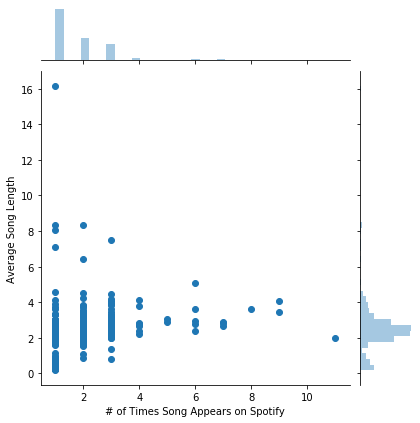

In [197]:
plt.figure(figsize=(10,6))
fig1 = sns.jointplot(data=summary_df[summary_df['Number_of_Times_on_Spotify']>=1],
                     x='Number_of_Times_on_Spotify',
                     y='Mean_Track_Length')

fig1.ax_joint.set_xlabel('# of Times Song Appears on Spotify')
fig1.ax_joint.set_ylabel('Average Song Length')


In [198]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf
print(__version__) # requires version >= 1.9.0

4.5.0


In [199]:
# For Notebooks
init_notebook_mode(connected=True)

In [200]:
# For offline use
cf.go_offline()

In [201]:
import plotly.express as px
fig = px.box(df, x='Release Year', y='Track Length')
fig.show()

In [212]:
fig = px.histogram(df, x='Popularity',nbins=100)
fig.show()

In [213]:
df.describe()

,Track Length,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2.728576,0.532137,0.520512,4.715356,-10.588633,0.092637,0.399164,0.061139,0.252632,0.623287,120.045039,42.357678
std,1.286471,0.155006,0.211224,3.426181,3.717782,0.183298,0.311577,0.183754,0.215810,0.257750,29.716396,15.208043
min,0.172667,0.000000,0.012400,0.000000,-27.456000,0.000000,0.000023,0.000000,0.037100,0.000000,0.000000,0.000000
25%,2.126550,0.422250,0.357750,2.000000,-11.917500,0.032625,0.096100,0.000000,0.105000,0.427500,96.962000,30.000000
50%,2.601667,0.541000,0.531000,4.000000,-9.874000,0.039750,0.346000,0.000007,0.160500,0.665000,121.255500,43.000000
75%,3.148721,0.642500,0.672500,7.000000,-8.333000,0.055975,0.679000,0.001158,0.324000,0.840000,137.203250,53.000000
max,16.174433,0.915000,0.969000,11.000000,-3.199000,0.954000,0.979000,0.942000,0.948000,0.980000,209.242000,81.000000


In [214]:
corr_df = df.corr()
corr_df.iplot(kind='heatmap',colorscale='blues')

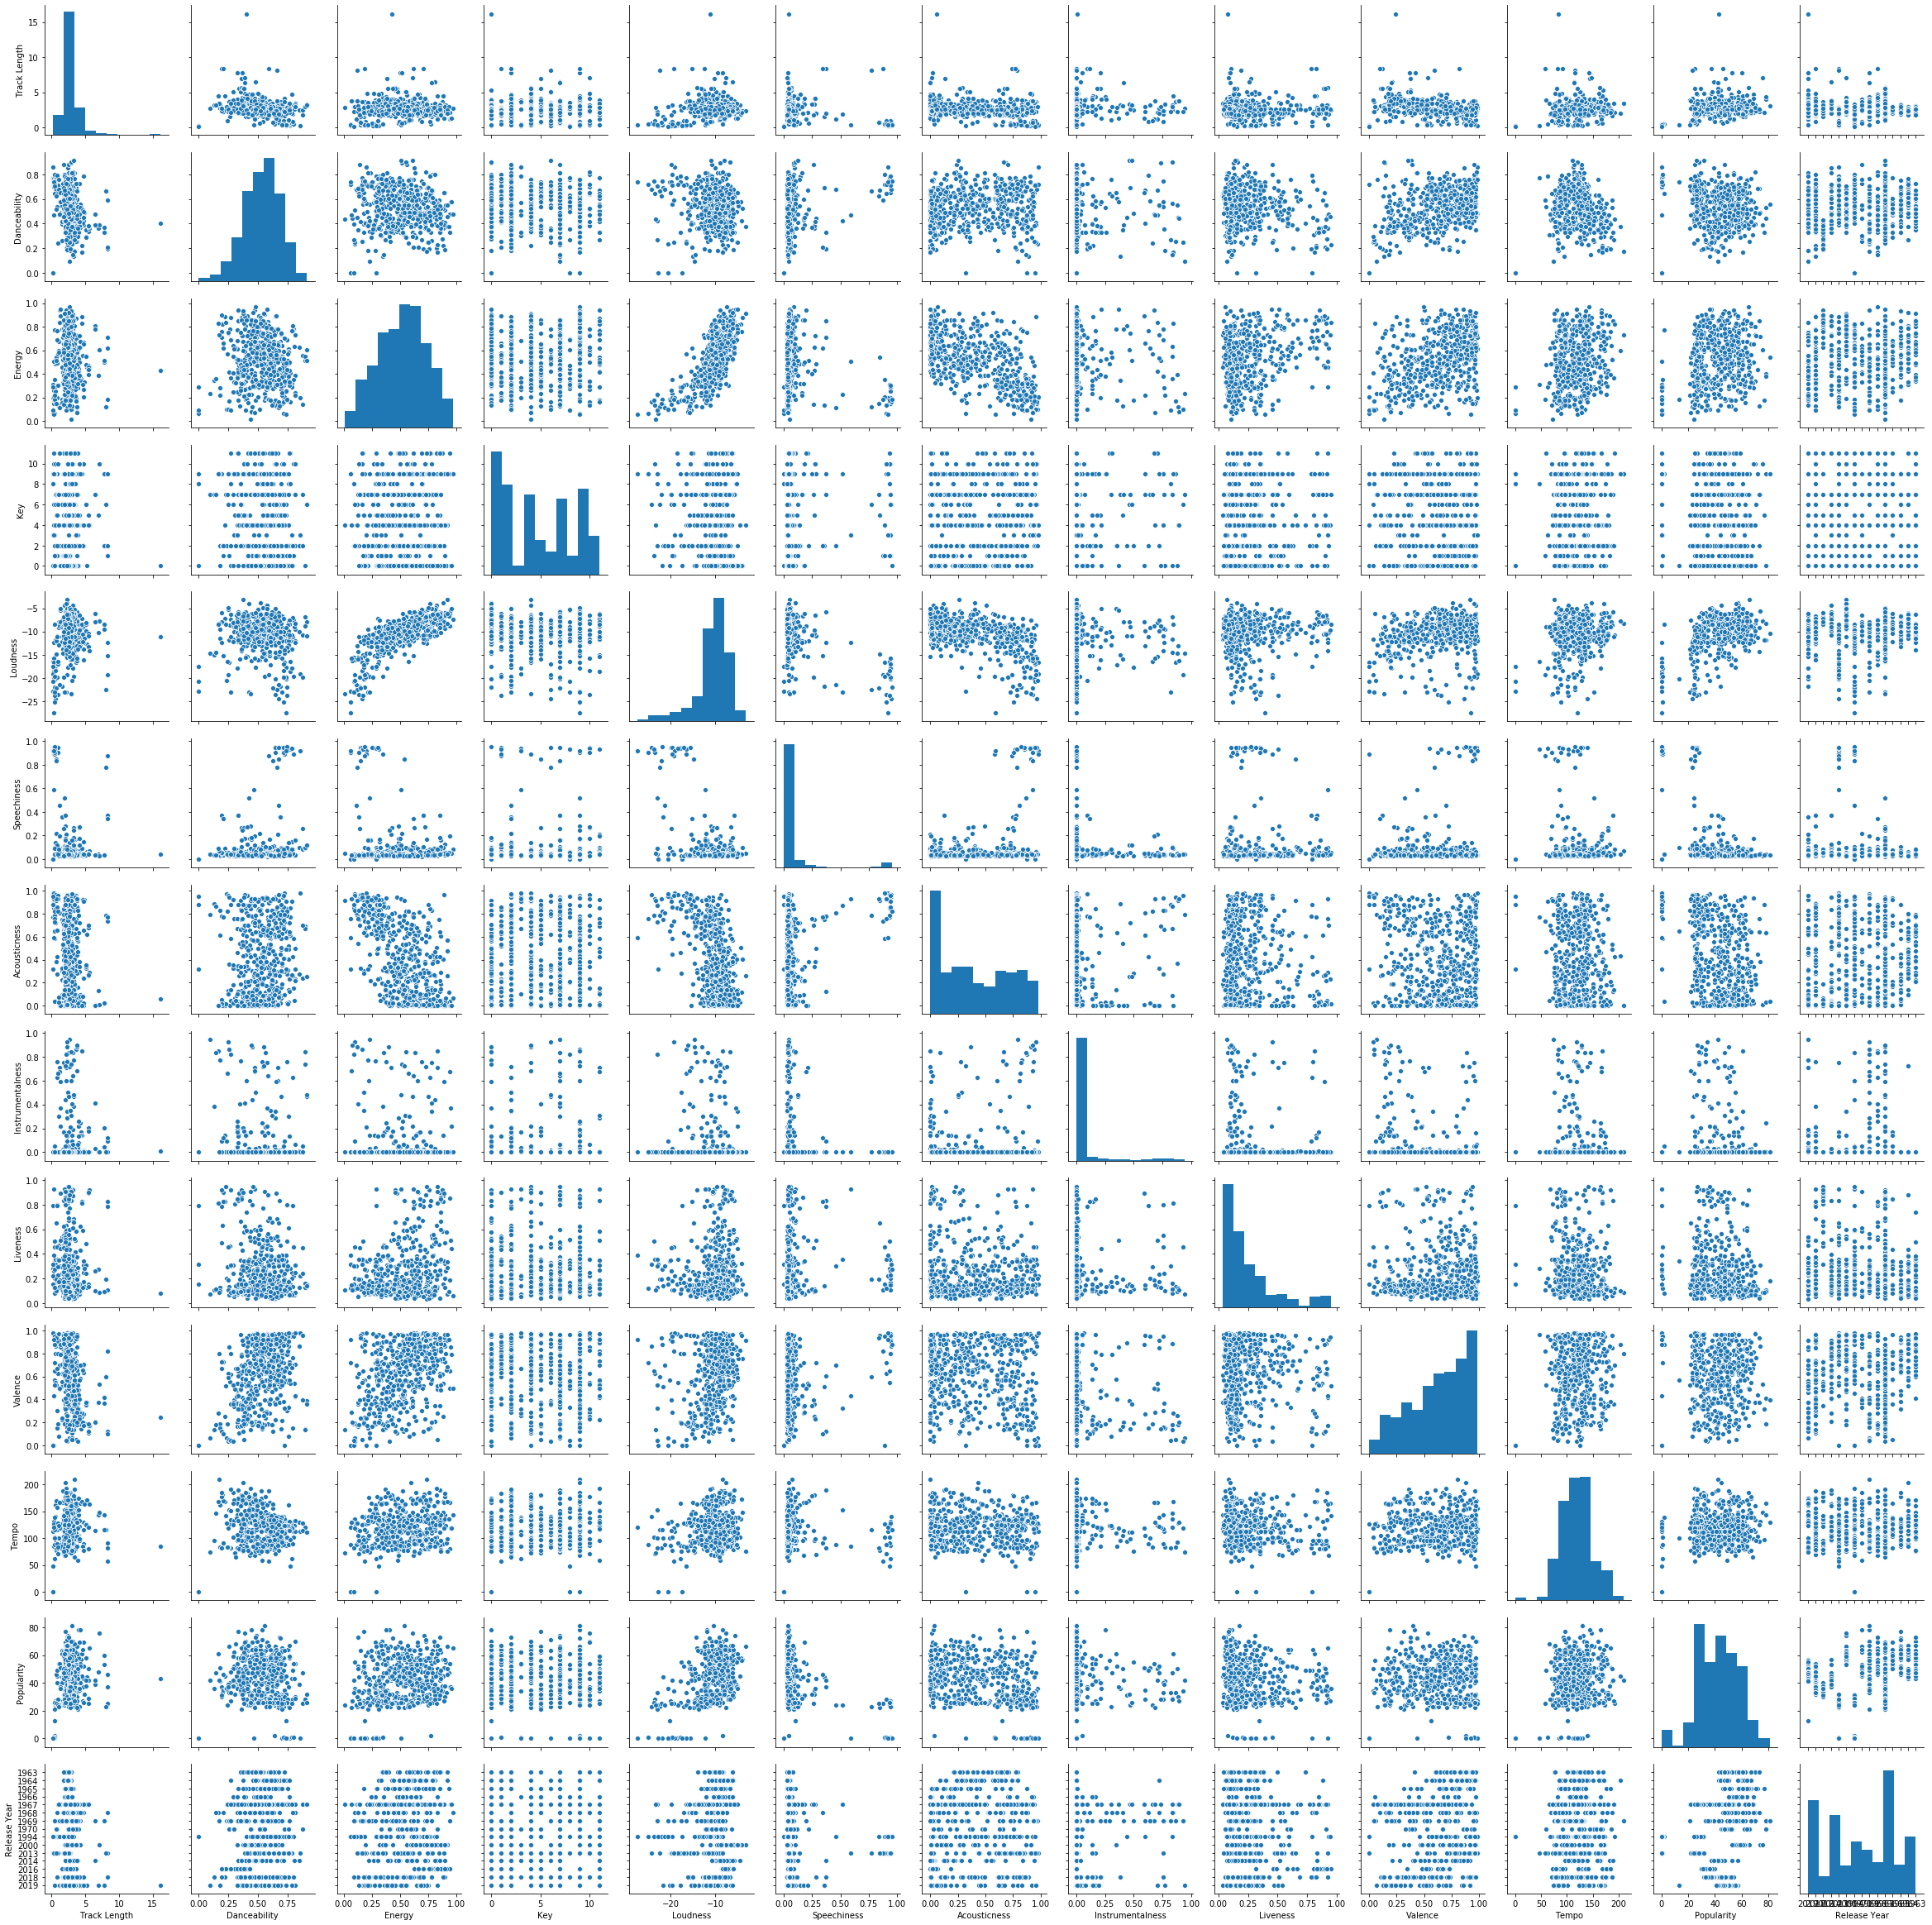

In [216]:
sns.pairplot(df)

In [217]:
df['Release Year'] = df['Release Year'].astype(str)

In [218]:
from prettytable import PrettyTable
# Sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

import random

%matplotlib inline

# Make results reproducible
random.seed(100)

In [219]:
df.columns

Index(['Artist_x', 'Track', 'Track Length', 'Track ID', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Artist_y', 'Album',
       'Album ID', 'Album Release', 'Popularity', 'Release Year', 'Track_New'],
      dtype='object')

In [266]:
x_columns = ['Track Length', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Release Year']
y_column = df['Popularity']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(model_df[x_columns], 
                                                    y_column, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [268]:
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]

for model in models:
    model.fit(X_train, y_train) 
    y_res = model.predict(X_test)

    mse = mean_squared_error(y_test, y_res)
    score = model.score(X_test, y_test)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
|         Lasso         |       168.41       |   0.36   |
|       ElasticNet      |       186.42       |   0.29   |
|         Ridge         |       165.64       |   0.37   |
|          SVR          |       173.50       |   0.34   |
|          SVR          |       253.98       |   0.04   |
|    BaggingRegressor   |       85.05        |   0.68   |
|    BaggingRegressor   |       206.90       |   0.21   |
|         NuSVR         |       255.73       |   0.03   |
| RandomForestRegressor |       73.69        |   0.72   |
+-----------------------+--------------------+----------+


In [269]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(X_train, y_train, 'training')
evaluate(X_test, y_test, 'validation')

print(table)

+-----------------------+------------+-------+------+-------+----------+
|         Model         |  Dataset   |  MSE  | MAE  | RMSLE | R² score |
+-----------------------+------------+-------+------+-------+----------+
| RandomForestRegressor |  training  | 11.54 | 2.52 |  0.16 |   0.95   |
| RandomForestRegressor | validation | 74.65 | 6.46 |  0.44 |   0.72   |
+-----------------------+------------+-------+------+-------+----------+


In [270]:
# Check out feature importance
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [271]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Release Year (0.249575)
2. feature Track Length (0.240590)
3. feature Loudness (0.121364)
4. feature Speechiness (0.115923)
5. feature Acousticness (0.054459)
6. feature Valence (0.050996)
7. feature Liveness (0.034984)
8. feature Danceability (0.034964)
9. feature Energy (0.031806)
10. feature Tempo (0.028652)
11. feature Instrumentalness (0.020703)
12. feature Key (0.015985)


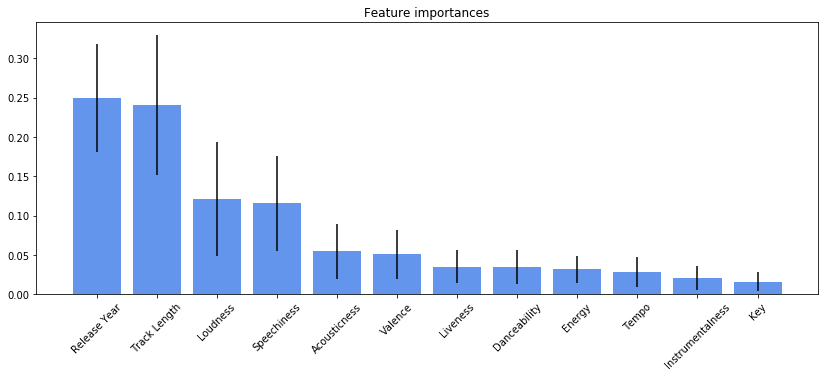

In [272]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,5))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [x_columns[i] for i in indices],rotation=45)
plt.xlim([-1, X_test.shape[1]])
plt.show()